In [104]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [105]:
#main_path = f'{os.getcwd()}'
Prosper_df = pd.read_csv("Data\prosperLoanData.csv")
Prosper_df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [106]:
Prosper_df.shape

(113937, 81)

In [107]:
Prosper_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

<Axes: xlabel='IsBorrowerHomeowner', ylabel='count'>

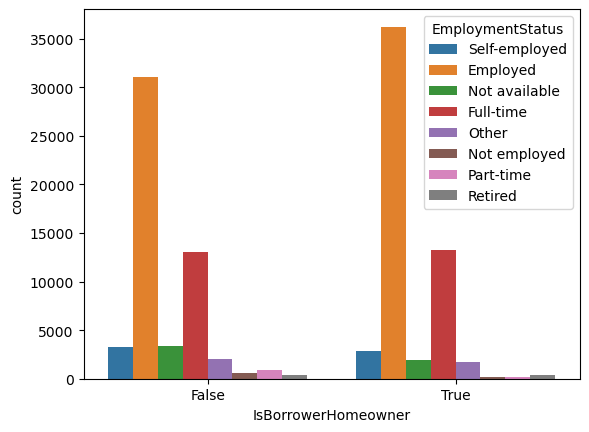

In [108]:
# EmploymentStatus & Homeownership
sns.countplot(x='IsBorrowerHomeowner',hue='EmploymentStatus',data=Prosper_df)
#IsBorrowerHomeowner, EmploymentStatus

<Axes: xlabel='IsBorrowerHomeowner', ylabel='count'>

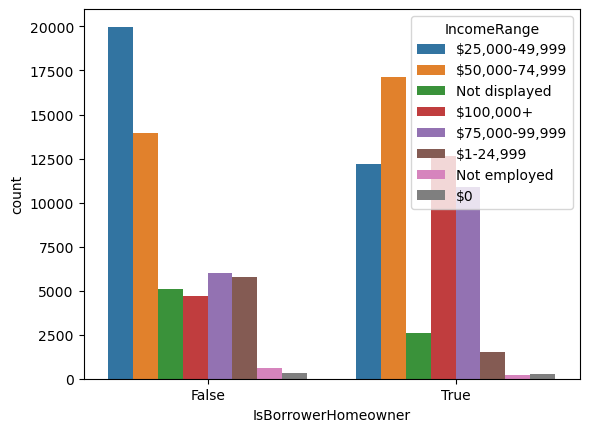

In [109]:
# EmploymentStatus & Homeownership
sns.countplot(x='IsBorrowerHomeowner',hue='IncomeRange',data=Prosper_df)
#IsBorrowerHomeowner, EmploymentStatus

<Axes: xlabel='ProsperRating (Alpha)', ylabel='count'>

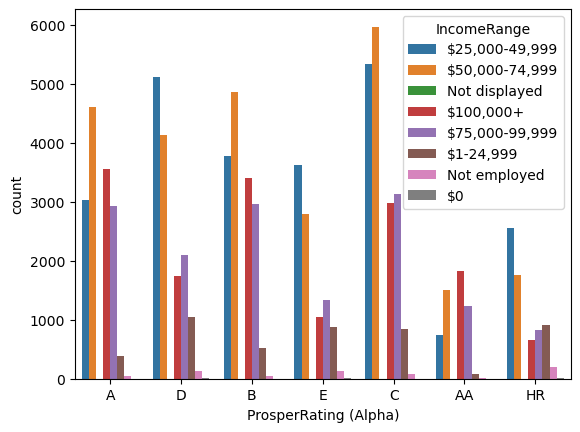

In [110]:
# IncomeRange & ProsperRating (Alpha)
sns.countplot(x='ProsperRating (Alpha)',hue='IncomeRange',data=Prosper_df)

In [111]:
Prosper_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [112]:
#Creating Credit Score ( Lowest + Highest credit score /2 )
Prosper_df['Average Credit Score'] = (Prosper_df['CreditScoreRangeLower'] + Prosper_df['CreditScoreRangeUpper']) / 2

In [113]:
#filling null values
Prosper_df.interpolate(method='linear', inplace=True)

In [114]:
#Making data frame with specific column 
specific_columns_df = ['LoanStatus',
'Term',
'ProsperRating (numeric)',
'Average Credit Score',
'EmploymentStatus',
'IsBorrowerHomeowner',
'IncomeRange',
'StatedMonthlyIncome',
'BorrowerRate',
'EmploymentStatusDuration',
'LoanMonthsSinceOrigination',
'LoanOriginalAmount',
'TotalProsperPaymentsBilled',
'OnTimeProsperPayments',
'LP_CustomerPayments',
'MonthlyLoanPayment',
'RevolvingCreditBalance',
'CurrentDelinquencies',
'Recommendations',
'Investors',
'ProsperPrincipalBorrowed',
'ProsperPrincipalOutstanding',]

In [115]:
specific_columnsss = Prosper_df[specific_columns_df]

In [116]:
Prosper_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Average Credit Score               0
Length: 82, dtype: int64

In [117]:
EmploymentStatus_unique_values = specific_columnsss['EmploymentStatus'].unique()
mapping = {
    'Self-employed': 1,
    'Employed': 1,
    'Not available': 0,
    'Full-time': 1,
    'Other': 4,
    'Not employed': 0,
    'Part-time': 2,
    'Retired': 3,
    'NaN': 0,
}

In [118]:
specific_columnsss['EmploymentStatus'] = specific_columnsss['EmploymentStatus'].replace(mapping)
specific_columnsss

,LoanStatus,Term,ProsperRating (numeric),Average Credit Score,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,BorrowerRate,EmploymentStatusDuration,...,TotalProsperPaymentsBilled,OnTimeProsperPayments,LP_CustomerPayments,MonthlyLoanPayment,RevolvingCreditBalance,CurrentDelinquencies,Recommendations,Investors,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
0,Completed,36,NaN,649.5,1.0,True,"$25,000-49,999",3083.333333,0.1580,2.0,...,NaN,NaN,11396.1400,330.43,0.0,2.0,0,258,NaN,NaN
1,Current,36,6.0,689.5,1.0,False,"$50,000-74,999",6125.000000,0.0920,44.0,...,NaN,NaN,0.0000,318.93,3989.0,0.0,0,1,NaN,NaN
2,Completed,36,6.0,489.5,0.0,False,Not displayed,2083.333333,0.2750,78.5,...,NaN,NaN,4186.6300,123.32,2716.5,1.0,0,41,NaN,NaN
3,Current,36,6.0,809.5,1.0,True,"$25,000-49,999",2875.000000,0.0974,113.0,...,NaN,NaN,5143.2000,321.45,1444.0,4.0,0,158,NaN,NaN
4,Current,36,3.0,689.5,1.0,True,"$100,000+",9583.333333,0.2085,44.0,...,11.000000,11.000000,2819.8500,563.97,6193.0,0.0,0,20,11000.000000,9947.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,Current,36,4.0,709.5,1.0,True,"$50,000-74,999",4333.333333,0.1864,246.0,...,42.333333,42.333333,3647.4000,364.74,7714.0,0.0,0,1,23000.666667,3506.863333
113933,FinalPaymentInProgress,36,6.0,709.5,1.0,True,"$75,000-99,999",8041.666667,0.1110,21.0,...,60.000000,60.000000,2330.5500,65.57,15743.0,1.0,0,22,33501.000000,4815.420000
113934,Current,60,3.0,709.5,1.0,True,"$25,000-49,999",2875.000000,0.2150,84.0,...,38.000000,38.000000,546.7000,273.35,22147.0,0.0,0,119,19250.500000,4039.895000
113935,Completed,60,4.0,689.5,1.0,True,"$25,000-49,999",3875.000000,0.2605,94.0,...,16.000000,16.000000,21122.5600,449.55,11956.0,0.0,0,274,5000.000000,3264.370000


In [119]:
IncomeRange_Unique = specific_columnsss['IncomeRange'].unique()
mapping = {
    '$0': 0,
    '$1-24,999': 1,
    '$25,000-49,999': 1,
    '$50,000-74,999': 2,
    '$75,000-99,999': 2,
    '$100,000+': 3,
    'Not employed': 0,
    'Not displayed': 0
}

In [120]:
specific_columnsss['IncomeRange'] = specific_columnsss['IncomeRange'].replace(mapping)
specific_columnsss

,LoanStatus,Term,ProsperRating (numeric),Average Credit Score,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,BorrowerRate,EmploymentStatusDuration,...,TotalProsperPaymentsBilled,OnTimeProsperPayments,LP_CustomerPayments,MonthlyLoanPayment,RevolvingCreditBalance,CurrentDelinquencies,Recommendations,Investors,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
0,Completed,36,NaN,649.5,1.0,True,1,3083.333333,0.1580,2.0,...,NaN,NaN,11396.1400,330.43,0.0,2.0,0,258,NaN,NaN
1,Current,36,6.0,689.5,1.0,False,2,6125.000000,0.0920,44.0,...,NaN,NaN,0.0000,318.93,3989.0,0.0,0,1,NaN,NaN
2,Completed,36,6.0,489.5,0.0,False,0,2083.333333,0.2750,78.5,...,NaN,NaN,4186.6300,123.32,2716.5,1.0,0,41,NaN,NaN
3,Current,36,6.0,809.5,1.0,True,1,2875.000000,0.0974,113.0,...,NaN,NaN,5143.2000,321.45,1444.0,4.0,0,158,NaN,NaN
4,Current,36,3.0,689.5,1.0,True,3,9583.333333,0.2085,44.0,...,11.000000,11.000000,2819.8500,563.97,6193.0,0.0,0,20,11000.000000,9947.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,Current,36,4.0,709.5,1.0,True,2,4333.333333,0.1864,246.0,...,42.333333,42.333333,3647.4000,364.74,7714.0,0.0,0,1,23000.666667,3506.863333
113933,FinalPaymentInProgress,36,6.0,709.5,1.0,True,2,8041.666667,0.1110,21.0,...,60.000000,60.000000,2330.5500,65.57,15743.0,1.0,0,22,33501.000000,4815.420000
113934,Current,60,3.0,709.5,1.0,True,1,2875.000000,0.2150,84.0,...,38.000000,38.000000,546.7000,273.35,22147.0,0.0,0,119,19250.500000,4039.895000
113935,Completed,60,4.0,689.5,1.0,True,1,3875.000000,0.2605,94.0,...,16.000000,16.000000,21122.5600,449.55,11956.0,0.0,0,274,5000.000000,3264.370000


In [121]:
IncomeRange_Unique = specific_columnsss['LoanStatus'].unique()
mapping = {
    'Completed': "1",
    'Current': "1",
    'FinalPaymentInProgress': "1",
    'Past Due (1-15 days)': "2",
    'Past Due (16-30 days)': "2",
    'Past Due (31-60 days)': "2",
    'Past Due (61-90 days)': "3",
    'Past Due (91-120 days)': "3",
    'Past Due (>120 days)': "3",
    'Chargedoff': "4",
    'Defaulted': "4",
    'Cancelled': "4",      
}
specific_columnsss['LoanStatus'] = specific_columnsss['LoanStatus'].replace(mapping)
specific_columnsss

,LoanStatus,Term,ProsperRating (numeric),Average Credit Score,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,BorrowerRate,EmploymentStatusDuration,...,TotalProsperPaymentsBilled,OnTimeProsperPayments,LP_CustomerPayments,MonthlyLoanPayment,RevolvingCreditBalance,CurrentDelinquencies,Recommendations,Investors,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
0,1,36,NaN,649.5,1.0,True,1,3083.333333,0.1580,2.0,...,NaN,NaN,11396.1400,330.43,0.0,2.0,0,258,NaN,NaN
1,1,36,6.0,689.5,1.0,False,2,6125.000000,0.0920,44.0,...,NaN,NaN,0.0000,318.93,3989.0,0.0,0,1,NaN,NaN
2,1,36,6.0,489.5,0.0,False,0,2083.333333,0.2750,78.5,...,NaN,NaN,4186.6300,123.32,2716.5,1.0,0,41,NaN,NaN
3,1,36,6.0,809.5,1.0,True,1,2875.000000,0.0974,113.0,...,NaN,NaN,5143.2000,321.45,1444.0,4.0,0,158,NaN,NaN
4,1,36,3.0,689.5,1.0,True,3,9583.333333,0.2085,44.0,...,11.000000,11.000000,2819.8500,563.97,6193.0,0.0,0,20,11000.000000,9947.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,1,36,4.0,709.5,1.0,True,2,4333.333333,0.1864,246.0,...,42.333333,42.333333,3647.4000,364.74,7714.0,0.0,0,1,23000.666667,3506.863333
113933,1,36,6.0,709.5,1.0,True,2,8041.666667,0.1110,21.0,...,60.000000,60.000000,2330.5500,65.57,15743.0,1.0,0,22,33501.000000,4815.420000
113934,1,60,3.0,709.5,1.0,True,1,2875.000000,0.2150,84.0,...,38.000000,38.000000,546.7000,273.35,22147.0,0.0,0,119,19250.500000,4039.895000
113935,1,60,4.0,689.5,1.0,True,1,3875.000000,0.2605,94.0,...,16.000000,16.000000,21122.5600,449.55,11956.0,0.0,0,274,5000.000000,3264.370000


In [122]:
specific_columnsss['LoanStatus'].unique()

array(['1', '2', '4', '3'], dtype=object)

In [123]:
specific_columnsss.to_csv('prosper_clean.csv')

In [124]:
specific_columnsss=specific_columnsss.dropna()

In [125]:
X = specific_columnsss[['Average Credit Score','BorrowerRate','LoanMonthsSinceOrigination','MonthlyLoanPayment',
'RevolvingCreditBalance','LoanOriginalAmount','LP_CustomerPayments','Investors','StatedMonthlyIncome']]
y = specific_columnsss[['LoanStatus']]

In [126]:
 # Define target vector
y = specific_columnsss["LoanStatus"].values
y

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [127]:
X

,Average Credit Score,BorrowerRate,LoanMonthsSinceOrigination,MonthlyLoanPayment,RevolvingCreditBalance,LoanOriginalAmount,LP_CustomerPayments,Investors,StatedMonthlyIncome
4,689.5,0.2085,6,563.97,6193.0,15000,2819.8500,20,9583.333333
5,749.5,0.1314,3,342.37,62999.0,15000,679.3400,1,8333.333333
6,689.5,0.2712,11,122.67,5812.0,3000,1226.7000,1,2083.333333
7,709.5,0.2019,10,372.60,1260.0,10000,3353.4000,1,3355.750000
8,829.5,0.0629,3,305.54,9906.0,10000,611.0800,1,3333.333333
...,...,...,...,...,...,...,...,...,...
113932,709.5,0.1864,11,364.74,7714.0,10000,3647.4000,1,4333.333333
113933,709.5,0.1110,28,65.57,15743.0,2000,2330.5500,22,8041.666667
113934,709.5,0.2150,3,273.35,22147.0,10000,546.7000,119,2875.000000
113935,689.5,0.2605,28,449.55,11956.0,15000,21122.5600,274,3875.000000


In [128]:
y

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [130]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [131]:
print(X_train.shape,X_test.shape)

(89342, 9) (22336, 9)


In [132]:
X_scaler = scaler.fit(X_train)

In [133]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [134]:
#from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
Rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=50)

In [135]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10)

In [136]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

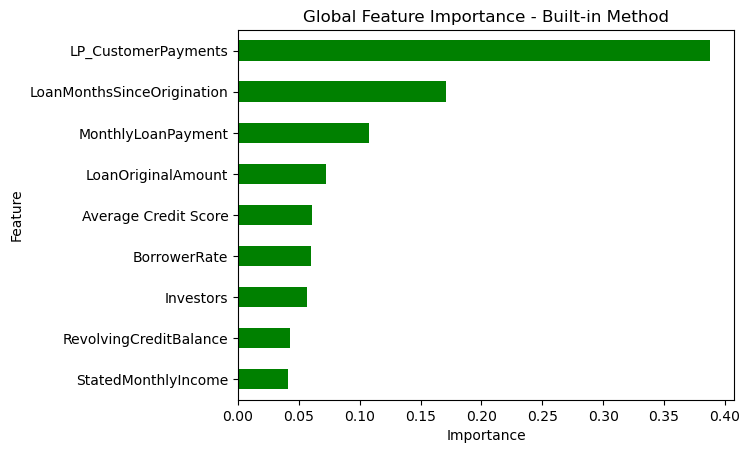

In [137]:
global_importances = pd.Series(Rf_model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [138]:
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Predict and calculate accuracy for cross-validation
pred_cv = model.predict(X_test)
print("Accuracy",(accuracy_score(y_test,pred_cv)*100))

Accuracy Score: % 87.71848137535817


In [139]:
pred_train = model.predict(X_train)
print("Accuracy: ",accuracy_score(y_train,pred_train))

Accuracy:  0.8760954177511402


In [140]:
#Logical Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [141]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(X_train) 
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.8374364239833807


In [142]:
#Linear SVM

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=15, random_state=5, tol=None)

In [143]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.8542348193605387


In [144]:
y_pred = model.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,4,4
4,1,1
...,...,...
27915,1,1
27916,1,1
27917,1,1
27918,1,1


In [145]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 3", "Actual 4"], columns=["Predicted 0", "Predicted 1", "Predicted 3", "Predicted 4"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [146]:
# Print the classification report for the model
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 3,Predicted 4
Actual 0,21890,0,2,1479
Actual 1,356,0,0,5
Actual 3,164,0,0,2
Actual 4,1982,0,5,2035


Accuracy Score : 0.8569126074498568
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.94      0.92     23371
           2       0.00      0.00      0.00       361
           3       0.00      0.00      0.00       166
           4       0.58      0.51      0.54      4022

    accuracy                           0.86     27920
   macro avg       0.37      0.36      0.36     27920
weighted avg       0.83      0.86      0.84     27920

